#Brute Force pada Aplikasi John The Ripper (Iteratif)

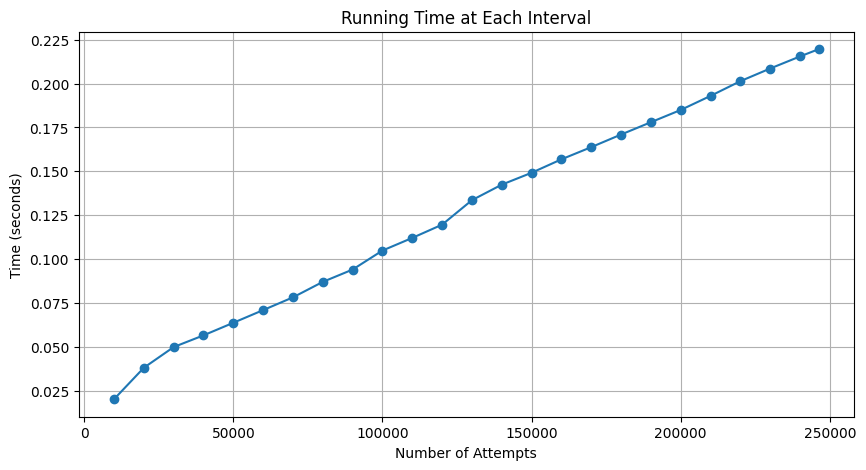

Password found: aaaaaaaabcde in 246207 attempts after 0.22 seconds


In [2]:
import itertools
import string
import time
import matplotlib.pyplot as plt

#Variabel global untuk menyimpan data waktu
global_times = []

def brute_force(target_password, max_length):
    global global_times  #Deklarasikan penggunaan variabel global
    characters = string.ascii_letters + string.digits  #Semua huruf dan angka
    attempts = 0
    interval = 10000
    start_time = time.time()

    for combination in itertools.product(characters, repeat=max_length):
        attempts += 1
        guess = ''.join(combination)
        #Catat waktu setiap interval
        if attempts % interval == 0:
            current_time = time.time()
            global_times.append((attempts, current_time - start_time))
        if guess == target_password:
            end_time = time.time()
            global_times.append((attempts, end_time - start_time))
            plot_times()
            return f"Password found: {guess} in {attempts} attempts after {end_time - start_time:.2f} seconds"

    end_time = time.time()
    global_times.append((attempts, end_time - start_time))
    plot_times()
    return f"Password not found after {end_time - start_time:.2f} seconds"

def plot_times():
    global global_times
    attempts, elapsed_time = zip(*global_times)
    plt.figure(figsize=(10, 5))
    plt.plot(attempts, elapsed_time, marker='o')
    plt.xlabel('Number of Attempts')
    plt.ylabel('Time (seconds)')
    plt.title('Running Time at Each Interval')
    plt.grid(True)
    plt.show()

#Contoh penggunaan
target_password = 'aaaaaaaabcde'  #Tentukan kata sandi target sederhana
result = brute_force(target_password, max_length = len(target_password))
print(result)


In [3]:
#Import dataset
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'arkhanfalih/aka-tugasbesar-rainbowtable'

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arkhanfalih/aka-tugasbesar-rainbowtable
License(s): apache-2.0
  0% 0.00/234k [00:00<?, ?B/s]
100% 234k/234k [00:00<00:00, 70.5MB/s]


In [4]:
#Unzip dataset yg sudah diimport
import zipfile
dataset_zip = zipfile.ZipFile('/content/aka-tugasbesar-rainbowtable.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [5]:
# Assuming the name of your file is 'example.txt'
file_name = "list.txt"

# Open the file and read the lines into a list
with open(file_name, 'r') as file:
    lines = file.readlines()

# You may want to strip newline characters
password_list = [line.strip() for line in lines]

#Rainbow Table-Create Hashing & LookUp (Recursive)


Rainbow Table created in 0.16132 seconds
Password found in 0.07540 seconds
Password found: aaaaaaaabcde


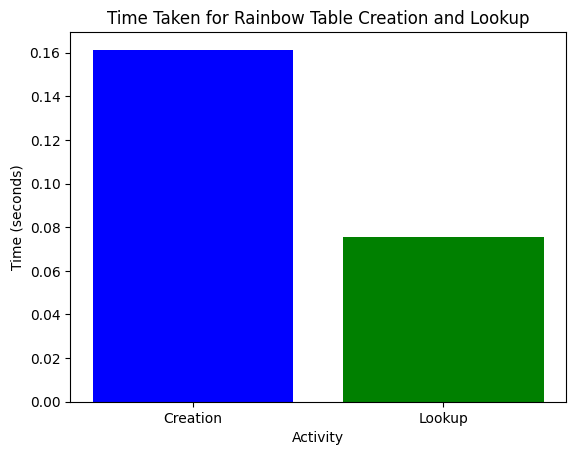

In [6]:
import hashlib
import time
import matplotlib.pyplot as plt

#Inisialisasi daftar untuk menyimpan waktu
creation_times = []
lookup_times = []

#Membuat rainbow table
def create_rainbow_table(password_list):
    start_time = time.time()  #Mulai pengaturan waktu untuk membuat tabel pelangi
    rainbow_table = {}
    for password in password_list:
        hash_value = hashlib.sha256(password.encode()).hexdigest()
        rainbow_table[hash_value] = password
    end_time = time.time()  #Waktu berakhir
    creation_time = end_time - start_time
    print(f"Rainbow Table created in {end_time - start_time:.5f} seconds")  #Waktu cetak yang dibutuhkan untuk membuat tabel pelangi
    creation_times.append(creation_time)  #Simpan waktu yang dibutuhkan
    return rainbow_table

#Pencarian rekursif dalam daftar tupel (hash, kata sandi)
def recursive_lookup(hash_value, rainbow_list, index=0):
    if index >= len(rainbow_list):
        return "Password not found", time.time()  #Kembalikan waktu saat ini ketika kata sandi tidak ditemukan
    if rainbow_list[index][0] == hash_value:
        return rainbow_list[index][1], time.time()  #Kembalikan kata sandi yang ditemukan dan waktu saat ini
    return recursive_lookup(hash_value, rainbow_list, index + 1)

#Mencari password dari hash secara rekursif
def rainbow_table_crack(hash_value, rainbow_table):
    start_time = time.time()  #Mulai menentukan waktu untuk memecahkan kata sandi
    rainbow_list = list(rainbow_table.items())  #Ubah kamus menjadi daftar tupel
    password, end_time = recursive_lookup(hash_value, rainbow_list)
    lookup_time = end_time - start_time
    print(f"Password found in {end_time - start_time:.5f} seconds")  #Waktu cetak yang dibutuhkan untuk membuat tabel pelangi
    lookup_times.append(lookup_time)  #Simpan waktu yang dibutuhkan untuk pencarian
    return password

#Berfungsi untuk merencanakan waktu
def plot_times(creation_times, lookup_times):
    activities = ['Creation', 'Lookup']
    times = [sum(creation_times), sum(lookup_times)]
    plt.bar(activities, times, color=['blue', 'green'])
    plt.xlabel('Activity')
    plt.ylabel('Time (seconds)')
    plt.title('Time Taken for Rainbow Table Creation and Lookup')
    plt.show()

#Contoh penggunaan
rainbow_table = create_rainbow_table(password_list)

#Kata sandi target khusus untuk demonstrasi
target_password = "aaaaaaaabcde"
target_hash = hashlib.sha256(target_password.encode()).hexdigest()

#Lakukan pencarian untuk hash target tertentu
result = rainbow_table_crack(target_hash, rainbow_table)
print(f"Password found: {result}" if result != "Password not found" else "Password not found")

#Perancangan waktu
plot_times(creation_times, lookup_times)


#Rainbow Table Running Graph (Recursive)

Password found in 0.01310 seconds
Password found: aaaaaaaabcde


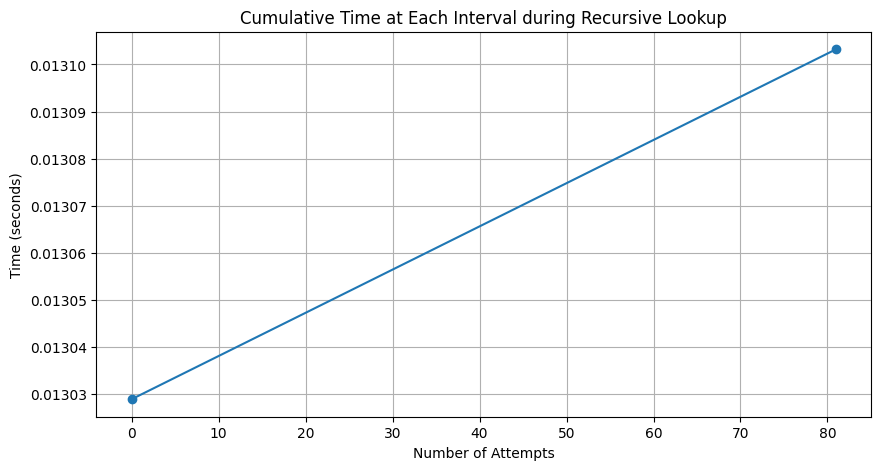

In [7]:
import hashlib
import time
import matplotlib.pyplot as plt

#Inisialisasi daftar untuk menyimpan waktu
creation_times = []
lookup_times = []
interval_times = []  #Simpan waktu di setiap interval

#Membuat meja pelangi
def create_rainbow_table(password_list):
    start_time = time.time()  #Mulai pengaturan waktu untuk membuat tabel pelangi
    rainbow_table = {}
    for password in password_list:
        hash_value = hashlib.sha256(password.encode()).hexdigest()
        rainbow_table[hash_value] = password
    end_time = time.time()  #Waktu berakhir
    creation_time = end_time - start_time
    creation_times.append(creation_time)  #Simpan waktu yang dibutuhkan
    return rainbow_table

#Pencarian rekursif dalam daftar tupel (hash, kata sandi)
def recursive_lookup(hash_value, rainbow_list, index=0, start_time=None, attempts=0):
    if start_time is None:
        start_time = time.time()  #Catat waktu mulai jika belum lewat

    if index >= len(rainbow_list):
        interval_times.append((attempts, time.time() - start_time))  #Catat waktu pada upaya terakhir
        return "Password not found", time.time()  # Return current time when password not found
    if rainbow_list[index][0] == hash_value:
        interval_times.append((attempts, time.time() - start_time))  #Catat waktu pada upaya yang ditemukan
        return rainbow_list[index][1], time.time()  #Kembalikan kata sandi yang ditemukan dan waktu saat ini
    if attempts % 10000 == 0:
        interval_times.append((attempts, time.time() - start_time))  #Catat waktu pada setiap interval

    return recursive_lookup(hash_value, rainbow_list, index + 1, start_time, attempts + 1)

#Mencari password dari hash secara rekursif
def rainbow_table_crack(hash_value, rainbow_table):
    start_time = time.time()  #Mulai menentukan waktu untuk memecahkan kata sandi
    rainbow_list = list(rainbow_table.items())  #Ubah kamus menjadi daftar tupel
    password, end_time = recursive_lookup(hash_value, rainbow_list, 0, start_time)
    lookup_time = end_time - start_time
    print(f"Password found in {end_time - start_time:.5f} seconds")  #Waktu cetak yang dibutuhkan untuk membuat tabel pelangi
    lookup_times.append(lookup_time)  #Simpan waktu yang dibutuhkan untuk pencarian
    return password

#Simpan waktu yang dibutuhkan untuk pencarian
def plot_times(interval_times):
    attempts, elapsed_time = zip(*interval_times)
    plt.figure(figsize=(10, 5))
    plt.plot(attempts, elapsed_time, marker='o')
    plt.xlabel('Number of Attempts')
    plt.ylabel('Time (seconds)')
    plt.title('Cumulative Time at Each Interval during Recursive Lookup')
    plt.grid(True)
    plt.show()

#Contoh penggunaan
rainbow_table = create_rainbow_table(password_list)

#Kata sandi target khusus untuk demonstrasi
target_password = "aaaaaaaabcde"
target_hash = hashlib.sha256(target_password.encode()).hexdigest()

#Lakukan pencarian untuk hash target tertentu
result = rainbow_table_crack(target_hash, rainbow_table)
print(f"Password found: {result}" if result != "Password not found" else "Password not found")

#Merencanakan waktu
plot_times(interval_times)
